In [1]:
from keras.datasets import mnist
from keras.layers import Conv2D,MaxPool2D,UpSampling2D,Input
from keras.models import Model
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [8]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

image is: 5


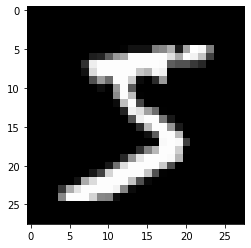

image is: 0


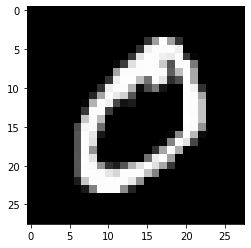

image is: 4


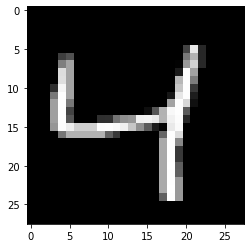

image is: 1


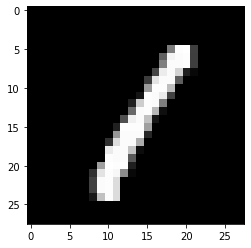

image is: 9


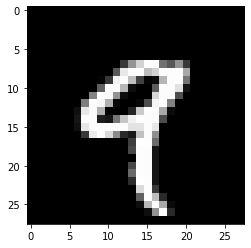

In [3]:
for i in range(5):
    print("image is:",ytrain[i])
    plt.imshow(xtrain[i],cmap='gray')
    plt.show()

In [4]:
xtrain=xtrain/255
xtest=xtest/255
xtrain=xtrain.reshape(len(xtrain),28,28,1)
xtest=xtest.reshape(len(xtest),28,28,1)
xtrain.shape
ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)

In [5]:
# autoencoder model
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:


autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(xtest, xtest),
                )



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.2120 - val_loss: 0.1686
Epoch 2/50
60000/60000 [==============================] - 10s 170us/step - loss: 0.1523 - val_loss: 0.1483
Epoch 3/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.1369 - val_loss: 0.1277
Epoch 4/50
60000/60000 [==============================] - 9s 158us/step - loss: 0.1288 - val_loss: 0.1327
Epoch 5/50
60000/60000 [==============================] - 9s 153us/step - loss: 0.1242 - val_loss: 0.1212
Epoch 6/50
60000/60000 [==============================] - 11s 178us/step - loss: 0.1212 - val_loss: 0.1193
Epoch 7/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1186 - val_loss: 0.1187
Epoch 8/50
60000/60000 [==============================] - 9s 154us/step - loss: 0.1170 - val_loss: 0.1159
Epoch 9/50
60000/60000 [==============================] - 10s 164us/step - loss: 0.1153 - val_los

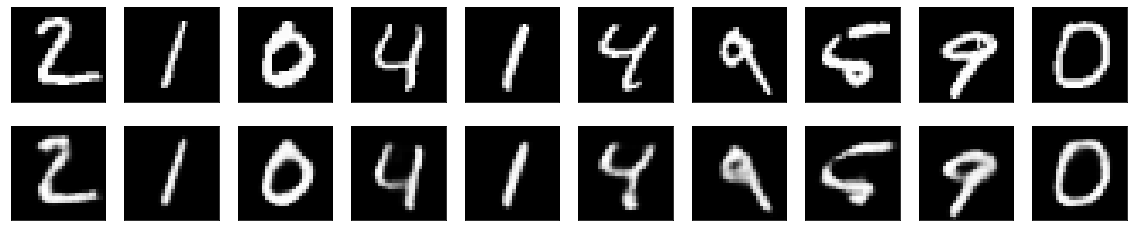

In [7]:
decoded_imgs = autoencoder.predict(xtest)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()